In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def rosenbrock2(x, y):
    return np.power(1 - x, 2) + 100 * np.power(y - np.power(x, 2), 2)
def rosenbrock2_gradient(x, y):
    dx = 2 * (x - 1) + 400 * (np.power(x, 2) - y)
    dy = 200 * y * (y - np.power(x, 2))
    return np.array([dx, dy])

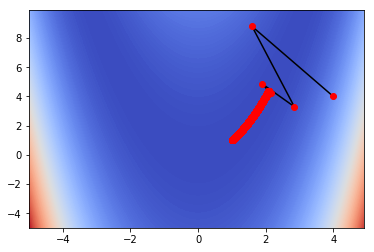

In [3]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
X,Y = np.meshgrid(x, y)
Z = rosenbrock2(X, Y)

plt.contourf(X, Y, Z, 250, cmap=plt.cm.coolwarm)

error = 10000
delta = 0.00000001
cx, cy = 4.0, 4.0
step_size = 0.0005

max_steps = 10000000
step_number = 0

pathx = [cx]
pathy = [cy]

while error > delta:
    dx, dy = rosenbrock2_gradient(cx, cy)
    cx = cx - dx * step_size
    cy = cy - dy * step_size
    pathx.append(cx)
    pathy.append(cy)
    
    error = math.sqrt(math.pow(pathx[-1] - pathx[-2], 2) + math.pow(pathy[-1] - pathy[-2], 2))
    
    
    if step_number > max_steps:
        break
    step_number += 1
    
plt.contourf(X, Y, Z, 250, cmap=plt.cm.coolwarm)
plt.plot(pathx, pathy, 'k', pathx, pathy, 'ro')
plt.show()

In [4]:
def rosenbrock2(theta):
    x = theta[0]
    y = theta[1]
    return np.power(1 - x, 2) + 100 * np.power(y - np.power(x, 2), 2)
def rosenbrock2_gradient(theta):
    x = theta[0]
    y = theta[1]
    dx = 2 * (x - 1) + 400 * (np.power(x, 2) - y)
    dy = 200 * y * (y - np.power(x, 2))
    return np.array([dx, dy])

In [5]:
def gradient_descent(x, y, z_func, z_func_gradient, delta, c, step_size, max_steps):
    X,Y = np.meshgrid(x, y)
    Z = z_func(np.array([X, Y]))
    path = np.array([c])

    error = 10000
    step_number = 0
    
    while error > delta:
        g = z_func_gradient(c)
        c = c - g * step_size
        path = np.append(path, [c], axis=0)
        error = math.sqrt(math.pow(path[-1][0] - path[-2][0], 2) + math.pow(path[-1][1] - path[-2][0], 2))


        if step_number > max_steps:
            break
        step_number += 1
    pathx = path[:, 0]
    pathy = path[:, 1]
    plt.contourf(X, Y, Z, 250, cmap=plt.cm.coolwarm)
    plt.plot(pathx, pathy, 'k', pathx, pathy, 'ro')
    plt.show()
    print(f"converged to {c} in {step_number} steps")

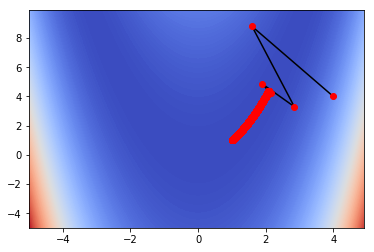

converged to [1.00000996 1.00001996] in 55134 steps


In [18]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
cx, cy = 4.0, 4.0
step_size = 0.0005
max_steps = 10000000
gradient_descent(x, y, rosenbrock2, rosenbrock2_gradient, delta, np.array([cx, cy]), step_size, max_steps)

In [19]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
cx, cy = 3.0, 3.0
step_size = 0.001
max_steps = 10000000
gradient_descent(x, y, rosenbrock2, rosenbrock2_gradient, delta, np.array([cx, cy]), step_size, max_steps)

OverflowError: math range error

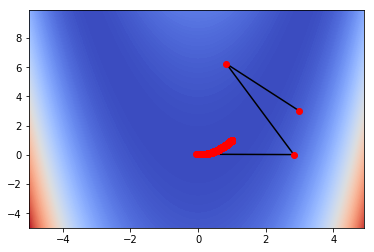

converged to [0.99999004 0.99998004] in 35145 steps


In [20]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
cx, cy = 3.0, 3.0
step_size = 0.0009
max_steps = 10000000
gradient_descent(x, y, rosenbrock2, rosenbrock2_gradient, delta, np.array([cx, cy]), step_size, max_steps)

Как и ожидалось, у обычного градиентного спуска возникают проблемы при оптимизации ф-ии Розенброка:
1. сходится алгоритм долго, из-за того что в какой-то момент начинает прыгать с одной стенки оврага на другую и почти не приближается к минимуму.
2. если величину шага задать слишком большой, алгоритм расходится и программа завершается с исключением из-за ограничений библиотеки math на принимаемые значения

# NADAM
Существуют различные методы ускорения и улучшения работы градиентного спуска. (Обширный список оптимизаций можно найти тут: http://ruder.io/optimizing-gradient-descent/)

Для примера будем использовать оптимизацию NADAM

Шаг алгоритма будет выглядеть следующим образом:

1. Найдем бегущее среднее вектора градиента и вектора в состоящего из квадратов элементов вектора градиента
$$m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t,$$
$$v_t = \beta_2 v_{t-1} + (1 - \beta_2)g_t^2,$$
где $g_t$ - вектор градиента, а $\beta_1 и \beta_2$ - параметры.

2. Посчитаем корректировки для этих значений:
$$\hat{m_t} = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v_t} = \frac{v_t}{1 - \beta_2^t}$$

3. Найдём следующее приближение:
$$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v_t}} + \varepsilon}(\beta_1\hat{m_t} + \frac{(1 - \beta_1)g_t}{1-\beta_1^t})$$

In [12]:
def nadam(x, y, z_func, z_func_gradient, delta, max_steps, c, eta, epsilon, beta_1, beta_2):
    X,Y = np.meshgrid(x, y)
    Z = z_func(np.array([X, Y]))
    path = np.array([c])

    error = 10000
    t = 1
    
    m = 0
    v = 0
    
    m_hat = 0
    v_hat = 0
    
    while error > delta:
        g = z_func_gradient(c)
        m = beta_1 * m + (1 - beta_1) * g
        v = beta_2 * v + (1 - beta_2) * g * g
        m_hat = m / (1 - math.pow(beta_1, t))
        v_hat = v / (1 - math.pow(beta_2, t))
        
        c = c - eta / (np.sqrt(v_hat) + epsilon) * (beta_1 * m_hat + (1 - beta_1) * g / (1 - math.pow(beta_1, t)))
        path = np.append(path, [c], axis=0)
        
        error = math.sqrt(math.pow(path[-1][0] - path[-2][0], 2) + math.pow(path[-1][1] - path[-2][0], 2))
        if t > max_steps:
            break
        t += 1
    
    pathx = path[:, 0]
    pathy = path[:, 1]
    plt.contourf(X, Y, Z, 250, cmap=plt.cm.coolwarm)
    plt.plot(pathx, pathy, 'k', pathx, pathy, 'ro')
    plt.show()
    print(f"converged to {c} in {t} steps")

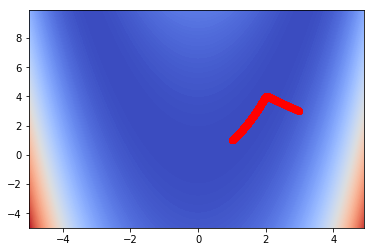

converged to [0.99999    0.99998001] in 16029 steps


In [21]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
c = np.array([3.0, 3.0])
eta = 0.005
epsilon = 10e-8
beta_1 = 0.9
beta_2 = 0.999
max_steps = 100000
nadam(x, y, rosenbrock2, rosenbrock2_gradient, delta, max_steps, c, eta, epsilon, beta_1, beta_2)

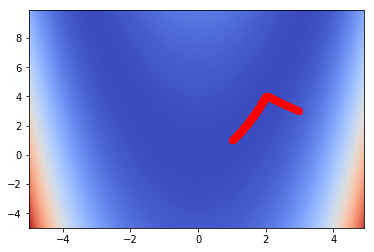

converged to [1.00041085 0.99861049] in 100001 steps


In [25]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
c = np.array([3.0, 3.0])
eta = 0.01
epsilon = 10e-8
beta_1 = 0.9
beta_2 = 0.999
max_steps = 100000
nadam(x, y, rosenbrock2, rosenbrock2_gradient, delta, max_steps, c, eta, epsilon, beta_1, beta_2)

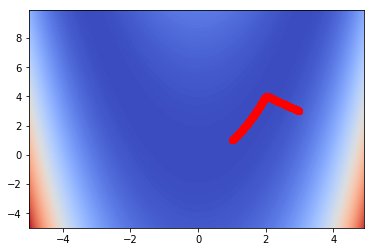

converged to [1.00000999 1.00001999] in 26439 steps


In [28]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,10.0,0.1)
delta = 0.00001
c = np.array([3.0, 3.0])
eta = 0.0005
epsilon = 10e-8
beta_1 = 0.9
beta_2 = 0.999
max_steps = 100000
nadam(x, y, rosenbrock2, rosenbrock2_gradient, delta, max_steps, c, eta, epsilon, beta_1, beta_2)